# Enunciado

Construya una red neuronal con el objetivo de realizar la predicción sobre la data asociada a los precios de las propiedades de Boston.

# Fuente y descripción de los datos

Este conjunto de datos se obtuvo del repositorio StatLib. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

La variable objetivo es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares ($100,000).

Este conjunto de datos se derivó del censo de EE. UU. de 1990, utilizando una fila por grupo de bloques censales. Un grupo de bloque es la unidad geográfica más pequeña para la que la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloque suele tener una población de 600 a 3000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que la cantidad promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.

Características del conjunto de datos:

Número de instancias 
20640

Número de atributos 
8 atributos numéricos, predictivos y el objetivo

Información de atributo 
* MedInc Ingreso promedio  

* HouseAge edad promedio de la casa 

* AveRooms Número promedio de habitaciones por hogar

* AveBedrms número promedio de dormitorios por hogar

* Population Población 

* AveOccup número promedio de miembros del hogar

* Latitude Latitud 

* Longitude Longitud 


Deberá abordar las etapas de la red


Importar librerías

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow import keras
from tensorflow import convert_to_tensor

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

Cargar datos

In [ ]:
df = fetch_california_housing(as_frame = True)
dataframe = pd.DataFrame(data = df.data, columns = df.feature_names)

In [ ]:
df

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

Análisis de los datos : Explorar los datos con al menos 3 técnicas diferentes

In [ ]:
print(dataframe)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
print(dataframe.dtypes)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object


In [ ]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Aplicar preprocesamiento a los datos : Al menos una técnica será necesaria

In [ ]:
dataframe["HouseAge"] = dataframe["HouseAge"].astype(int)

In [ ]:
dataframe["Population"] = dataframe["Population"].astype(int)

In [ ]:
dataframe = dataframe.rename(
    columns = {
        "MedInc":     "Ingreso promedio",
        "HouseAge":   "Edad promedio de la casa",
        "AveRooms":   "Número promedio de habitaciones por hogar",
        "AveBedrms":  "Número promedio de dormitorios por hogar",
        "Population": "Población",
        "AveOccup":   "Número promedio de miembros del hogar",
        "Latitude":   "Latitud",
        "Longitude":  "Longuitud"
    }
)

In [ ]:
# Info: https://www.tensorflow.org/tutorials/load_data/pandas_dataframe
SHUFFLE_BUFFER: int = int(500)
BATCH_SIZE: int = int(3)

target = dataframe.pop('Ingreso promedio')

numeric_feature_names: list = [
    # str("Ingreso promedio"),
    str("Edad promedio de la casa"),
    str("Número promedio de habitaciones por hogar"),
    str("Número promedio de dormitorios por hogar"),
    str("Población"),
    str("Número promedio de miembros del hogar"),
    str("Latitud"),
    str("Longuitud")
]

numeric_features = dataframe[numeric_feature_names]
numeric_features.head()

,Edad promedio de la casa,Número promedio de habitaciones por hogar,Número promedio de dormitorios por hogar,Población,Número promedio de miembros del hogar,Latitud,Longuitud
0,41,6.984127,1.023810,322,2.555556,37.88,-122.23
1,21,6.238137,0.971880,2401,2.109842,37.86,-122.22
2,52,8.288136,1.073446,496,2.802260,37.85,-122.24
3,52,5.817352,1.073059,558,2.547945,37.85,-122.25
4,52,6.281853,1.081081,565,2.181467,37.85,-122.25


In [ ]:
convert_to_tensor(numeric_features)

<tf.Tensor: shape=(20640, 7), dtype=float64, numpy=
array([[  41.        ,    6.98412698,    1.02380952, ...,    2.55555556,
          37.88      , -122.23      ],
       [  21.        ,    6.23813708,    0.97188049, ...,    2.10984183,
          37.86      , -122.22      ],
       [  52.        ,    8.28813559,    1.07344633, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [  17.        ,    5.20554273,    1.12009238, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [  18.        ,    5.32951289,    1.17191977, ...,    2.12320917,
          39.43      , -121.32      ],
       [  16.        ,    5.25471698,    1.16226415, ...,    2.61698113,
          39.37      , -121.24      ]])>

In [ ]:
normalizer = keras.layers.Normalization(axis = -1)
normalizer.adapt(numeric_features)

In [ ]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[ 0.9821438 ,  0.62855977, -0.1537572 , -0.97442883, -0.04959657,
         1.0525376 , -1.3278531 ],
       [-0.6070186 ,  0.32704166, -0.26333556,  0.8614402 , -0.09251229,
         1.0431736 , -1.3228607 ],
       [ 1.8561832 ,  1.1556209 , -0.04901604, -0.8207775 , -0.02584255,
         1.0384908 , -1.3328416 ]], dtype=float32)>

Separar datos de entrenamiento y prueba

In [ ]:
numeric_features = numeric_features.to_numpy()
X = numeric_features[:,0:7]
Y = numeric_features[7]

Crear la arquitectura de la red: proponga la cantidad de neuronas y capas ocultas que estime conveniente

In [ ]:
modelo = keras.Sequential()
  
modelo.add(normalizer)

modelo.add(
    Dense(
        10,
        input_dim = 8,
        # activation = str('relu'),
        activation = str('selu'),
        name = "1"
    )
)

modelo.add(
    Dense(
        10,
        # activation = str('relu'),
        activation = str('selu'),
        name = "2"
    )
)

modelo.add(
    Dense(
        5,
        # activation = str('relu'),
        activation = str('selu'),
        name = "3"
    )
)

modelo.add(
    Dense(
        2,
        activation = str('relu'),
        # activation = str('selu'),
        name = "4"
    )
)

modelo.add(
    Dense(
        1,
        activation = str('sigmoid'),
        name = "Final"
    )
)



modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 1 (Dense)                   (None, 10)                80        
                                                                 
 2 (Dense)                   (None, 10)                110       
                                                                 
 3 (Dense)                   (None, 5)                 55        
                                                                 
 4 (Dense)                   (None, 2)                 12        
                                                                 
 Final (Dense)               (None, 1)                 3         
                                                        

Argumentación capas:
Utilizo "selu" porque, cuando trabaja con los datos numéricos, hace que se mantiene la Media y la Varianza.

Defina el modelo de compilación, considerando los hiperparámetros pertinentes al estudio

In [ ]:
modelo.compile(
    optimizer = str('adam'),
    loss = "logcosh",
    metrics = [
        str('MeanSquaredLogarithmicError'),
    ]
)

Entrene el modelo

In [ ]:
#Acá su código
h = modelo.fit(
    numeric_features,
    target,
    epochs = int(15),
    batch_size = BATCH_SIZE
)

Epoch 1/15
6880/6880 [==============================] - 26s 3ms/step - loss: 2.2466 - mean_squared_logarithmic_error: 0.8267
Epoch 2/15
6880/6880 [==============================] - 12s 2ms/step - loss: 2.2300 - mean_squared_logarithmic_error: 0.8074
Epoch 3/15
6880/6880 [==============================] - 12s 2ms/step - loss: 2.2300 - mean_squared_logarithmic_error: 0.8074
Epoch 4/15
6880/6880 [==============================] - 12s 2ms/step - loss: 2.2300 - mean_squared_logarithmic_error: 0.8074
Epoch 5/15
6880/6880 [==============================] - 12s 2ms/step - loss: 2.2300 - mean_squared_logarithmic_error: 0.8074
Epoch 6/15
6880/6880 [==============================] - 12s 2ms/step - loss: 2.2300 - mean_squared_logarithmic_error: 0.8074
Epoch 7/15
6880/6880 [==============================] - 12s 2ms/step - loss: 2.2300 - mean_squared_logarithmic_error: 0.8074
Epoch 8/15
6880/6880 [==============================] - 12s 2ms/step - loss: 2.2300 - mean_squared_logarithmic_error: 0.8074


Evalue el modelo : muestre métricas de evaluación y gráficos para evaluar la pérdida y la precisión del entrenamiento

In [ ]:
#Acá su código
scores = modelo.evaluate(numeric_features, target)
count: int = int(0)

for i in scores:
  score: float = float(scores[count] * 100)
  name: str = str(modelo.metrics_names[count])
  print("\n%s: %.2f%%" % (name, score))

  count += int(1)

645/645 [==============================] - 1s 2ms/step - loss: 2.2300 - mean_squared_logarithmic_error: 0.8074

loss: 223.00%

mean_squared_logarithmic_error: 80.74%


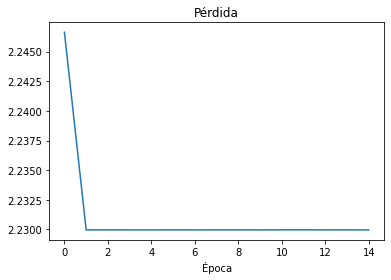

In [ ]:
plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

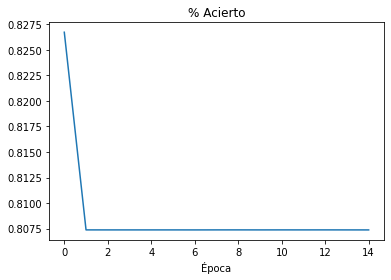

In [ ]:
plt.plot(h.history['mean_squared_logarithmic_error'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

Realice alguna predicción

In [ ]:
#Acá su código
import random

EdadCasa: list = [random.randint(1, 52)]
CantidadHabitaciones: list = [random.uniform(0.846154, 141.909091)]
CantidadDormitorios: list = [random.uniform(0.333333, 34.066667)]
Poblacion: list = [random.randint(3, 35682)]
MiembrosHogar: list = [random.uniform(0.692308, 1243.333333)]
Latitud: list = [random.uniform(32.54, 41.95)]
Longuitud: list = [random.uniform(-124.35, -114.31)]

print("1. Edad casa:", EdadCasa)
print("2. Cantidad habitaciones:", CantidadHabitaciones)
print("3. Cantidad dormitorios:", CantidadDormitorios)
print("4. Poblacion:", Poblacion)
print("5. Miembros hogar:", MiembrosHogar)
print("6. Latitud:", Latitud)
print("7. Longuitud:", Longuitud)

1. Edad casa: [36]
2. Cantidad habitaciones: [17.118621602927455]
3. Cantidad dormitorios: [14.352943515052491]
4. Poblacion: [5408]
5. Miembros hogar: [530.0142009603952]
6. Latitud: [35.68032588509229]
7. Longuitud: [-123.79132459196092]


In [ ]:
listaAleatoria: list = []
listaAleatoria.append(EdadCasa)
listaAleatoria.append(CantidadHabitaciones)
listaAleatoria.append(CantidadDormitorios)
listaAleatoria.append(Poblacion)
listaAleatoria.append(MiembrosHogar)
listaAleatoria.append(Latitud)
listaAleatoria.append(Longuitud)

predictions = modelo.predict(listaAleatoria)
print(predictions)

[[1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [0.9999982]]


# Conclusiones

En esta sección debería aportar sus conclusiones

Dependiendo de las características de la vivienda, aumentará o disminuirá el ingreso promedio.